In [1]:
import keras 
from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator ,load_img
from keras.layers.normalization import BatchNormalization

Using TensorFlow backend.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split

In [3]:
#Importing Data from CSV file
data=pd.read_csv("fer2013.csv")

In [4]:
data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [5]:
labels=data.iloc[:,[0]].values

In [6]:
labels

array([[0],
       [0],
       [2],
       ...,
       [0],
       [3],
       [2]], dtype=int64)

In [7]:
pixels=data['pixels']

In [8]:
pixels.head()

0    70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1    151 150 147 155 148 133 111 140 170 174 182 15...
2    231 212 156 164 174 138 161 173 182 200 106 38...
3    24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4    4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
Name: pixels, dtype: object

In [9]:
#Facial Expressions
Expressions={0:"Angry",1:"Disgust",2:"Fear",3:"Happy",4:"Sad",5:"Surprise",6:"Neutral"}
from keras.utils import to_categorical 
labels = to_categorical(labels,len(Expressions))

In [10]:
#converting pixels to Gray Scale images of 48X48 
images = np.array([np.fromstring(pixel, dtype=int, sep=" ")for pixel in pixels])
images=images/255.0
images = images.reshape(images.shape[0],48,48,1).astype('float32')

'Disgust'

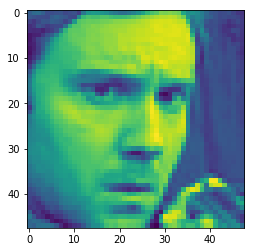

In [11]:
plt.imshow(images[0][:,:,0])
Expressions[labels[0][0]]

'Angry'

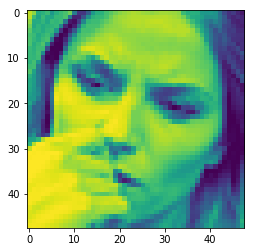

In [12]:
plt.imshow(images[2][:,:,0])
Expressions[labels[2][0]]

In [13]:
#splitting data into training and test data
train_images,test_images,train_labels,test_labels = train_test_split(images,labels,test_size=0.2,random_state=0)

In [14]:
train_labels

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [15]:
def create_convolutional_model(classes):
    model = Sequential()
    model.add(Conv2D(32,kernel_size=(2,2),strides=(1,1),activation='relu',input_shape=(48,48,1)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(filters=64,kernel_size=(2,2),strides=(1,1),activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2),strides=(1,1)))
    model.add(Dropout(0.25))#to prevent neural network from overfitting
    
    model.add(Conv2D(filters=128,kernel_size=(2,2),strides=(1,1),activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2),strides=(1,1)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(filters=256,kernel_size=(2,2),strides=(1,1),activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2),strides=(1,1)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    
    model.add(Dense(256,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    model.add(Dense(512,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    model.add(Dense(classes,activation='softmax'))
    
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model 

In [16]:
classes=7
model = create_convolutional_model(classes)
model.summary()

W0205 12:31:35.939189  7176 deprecation.py:506] From C:\Users\sreekar chidurala\Anaconda3\lib\site-packages\tensorflow\python\training\moving_averages.py:210: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0205 12:31:36.016355  7176 deprecation.py:506] From C:\Users\sreekar chidurala\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 47, 47, 32)        160       
_________________________________________________________________
batch_normalization_1 (Batch (None, 47, 47, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 64)        8256      
_________________________________________________________________
batch_normalization_2 (Batch (None, 22, 22, 64)        256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 21, 21, 64)        0         
__________

In [17]:
#train the CNN 
#model.fit(train_images,train_labels,batch_size=105,epochs=15,verbose=2)

In [23]:
label_pred=model.predict(test_images)
label_pred=np.argmax(label_pred,axis = 1)

Normalized confusion matrix
[[3.26742976e-01 8.32466181e-03 9.88553590e-02 1.09261186e-01
  2.31009365e-01 2.39334027e-02 2.01873049e-01]
 [9.43396226e-02 3.77358491e-01 1.22641509e-01 5.66037736e-02
  1.69811321e-01 2.83018868e-02 1.50943396e-01]
 [8.64811133e-02 2.98210736e-03 3.37972167e-01 5.66600398e-02
  2.53479125e-01 1.06361829e-01 1.56063618e-01]
 [2.28633642e-02 5.44365814e-04 1.68753402e-02 7.40337507e-01
  7.13119216e-02 1.95971693e-02 1.28470332e-01]
 [6.02696273e-02 2.37906423e-03 8.56463125e-02 6.10626487e-02
  5.27359239e-01 1.34813640e-02 2.49801745e-01]
 [2.75344180e-02 1.25156446e-03 9.26157697e-02 6.63329161e-02
  3.75469337e-02 7.17146433e-01 5.75719650e-02]
 [6.62251656e-02 2.48344371e-03 4.38741722e-02 7.61589404e-02
  1.98675497e-01 1.24172185e-02 6.00165563e-01]]


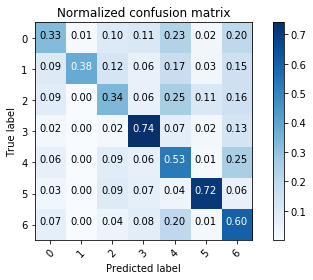

In [24]:
#making confusion matrix
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

test_labels=np.argmax(test_labels,axis=1)
# Compute confusion matrix
cnf_matrix = confusion_matrix(test_labels,label_pred)
class_names=Expressions
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [25]:
#Save the weights
filename='model_weights_15epochs.hdf5'
model.save_weights(filename,overwrite=True)

In [18]:
#saving  hdf5 to model
filename='model_weights_15epochs.hdf5'
model.load_weights(filename)

In [19]:
from keras.models import load_model

In [20]:
import cv2
def make_prediction(unknown):
    unknown=cv2.resize(unknown,(48,48))
    unknown=unknown/255.0
    unknown=np.array(unknown).reshape(-1,48,48,1)
    predict=np.argmax(model.predict(unknown),axis = 1)
    return predict[0]  

In [21]:
def face_in_video():
    face_cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
    cap=cv2.VideoCapture(0)
    while True:
        ret,img=cap.read()  
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray,1.3,5)
        
        for (x,y,w,h) in faces:
            sub_face = gray[y:y+h, x:x+w]
            cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
            res=make_prediction(sub_face)
            font = cv2.FONT_HERSHEY_SIMPLEX
            cv2.putText(img,str(Expressions[res]),(x,y-5),font,0.9,(205,200,50),2,cv2.LINE_AA)
        cv2.imshow('show your fucking face',img)
        if cv2.waitKey(1) & 0xFF ==ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()  

In [ ]:
face_in_video()

In [2]:
#import cv2
#cv2.DestroyWindow()